# EARIN Exercise 4 - Regression and Classification
### Authors: Mieszko Niewiarowski 300173, Krzysztof Piotrowski 300175 
### Date: 26.04.2022

# Introduction
The aim of this project is to write an application for predicting the DDoS attack or normal packet basing on commonly available NSL-KDD dataset. This is an example of dataset which allows to analyse intrusion detection methods. It lets to discover which factors have a significant impact on anomalies or normal usage. The dataset consists of some files, which can be used for anomaly detection analysis. Files are formatted in two formats namely: txt and arrf. Arrf extension stands for Attribute-Relation File Format. This is an example of ASCII text file which is widely utilized in machine learning. It consists of 2 sections: header and data. The first part corresponds to the section which is describes relations, attributes and data types. The second segment stores data values separated by commas. Each row corresponds to separate data inputs. In our project we decide to use this file for analysis instead of txt file due to the fact that we do not need to additionaly hardcode columns. It is important to note that in text files for our datasets some information is more expanded and can be grouped more different ways. We take into consideration train+ file and test+ file. Train+ file is our basis set on which we train selected models. Models is tested on smaller test+ file. This experiment is an example of classification. Classification is a method of categorizing a dataset into classes in a structured or unstructured manner. The aim of classification is to make conclusions from reasearched values. Basing on the input data, the model can predict the possible outcomes. It takes into account situations in which categorical variables are produced. The given NSL-KDD dataset stores 'class' information which is an information whether the input is 'normal' or 'anomaly'. This is the crucial category which is the basis for training our model. There different common classification models such as: Naive Bayes, random forests, decision trees, linear regression, support vector machines, stochastic gradient descent. We decided to use 2 classification methods namely: logistic regression and random forest classifiers. Logistic regression is a method of classification in machine learning which uses logistic function to model the dependent variable. It is commonly used when there are 2 possible outcomes. It refers whether the condition is fulfilled or not. It is especially utilized to comprehend the impact of several independent variables. However, it has an important drawback. Predicted variable assumes the self-containment of variables and they are binary. On the other hand, random forrest classifier is a technique which matches a specific amount of decision trees on various sub-samples of datasets and uses average to improve the prediction accuracy. Random forest is one of the most accurate classification algorithm. Unfortunately this techinque is quite complex which makes this algorithm really slow. For the purpose of this project we used popular machine learning libraries with useful tools such as sklearn, pandas, numpy, seaborn, matplotlib.

In [277]:
from scipy.io import arff
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder, StandardScaler


# Data Import

Firstly, it is important to somehow load data and save it to variables. In order to do that we load arff files and we save them as data frames. After that we have to check whether everything is imported without errors.

In [258]:
data_train = arff.loadarff('KDDTrain+.arff')
data_test = arff.loadarff("KDDTest+.arff")

train_df = pd.DataFrame(data_train[0])
test_df = pd.DataFrame(data_test[0])
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,b'tcp',b'ftp_data',b'SF',491.0,0.0,b'0',0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,b'normal'
1,0.0,b'udp',b'other',b'SF',146.0,0.0,b'0',0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,b'normal'
2,0.0,b'tcp',b'private',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,b'anomaly'
3,0.0,b'tcp',b'http',b'SF',232.0,8153.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,b'normal'
4,0.0,b'tcp',b'http',b'SF',199.0,420.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,b'normal'


# Data Analysis

Subsequently, we can start analysis of our data. We have to check whether no data is missing, present some general statistics, and get information about the most important factor which is called 'class'.

In [259]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  float64
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  float64
 5   dst_bytes                    125973 non-null  float64
 6   land                         125973 non-null  object 
 7   wrong_fragment               125973 non-null  float64
 8   urgent                       125973 non-null  float64
 9   hot                          125973 non-null  float64
 10  num_failed_logins            125973 non-null  float64
 11  logged_in                    125973 non-null  object 
 12  num_compromised              125973 non-null  float64
 13 

In [260]:
train_df.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.022687,0.000111,0.204409,0.001222,0.279250,0.001342,0.001103,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.253530,0.014366,2.149968,0.045239,23.942042,0.036603,0.045154,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,3.000000,3.000000,77.000000,5.000000,7479.000000,1.000000,2.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All data is provided, the dataset does not contain empty values. It is possible to observe that there are 67343 'normal' actions and 58630 'anomaly' in the provided dataset.

In [261]:
train_df['class'].value_counts(sort=True)

b'normal'     67343
b'anomaly'    58630
Name: class, dtype: int64

# Preprocessing

The next step is to prepare the data for the analysis. This step consists of checking categorical variables, transforming them to numerical format, checking which information is not obligatory and preparing data to be used within the specific models.

## Categorical features

First of all, it is important to get some information about the categorical features. It is possible to observe that inside training set, there are following categorical features: 'protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login', 'class'. It is possible to observe that service category consist of the biggest number of the values which is 70 in train set. 

In [262]:
# colums that are categorical and not binary yet: protocol_type (column 2), service (column 3), flag (column 4).
# explore categorical features
print('Training set:')
for col_name in train_df.columns:
    if train_df[col_name].dtypes == 'object' :
        unique_cat = len(train_df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

#see how distributed the feature service is, it is evenly distributed and therefore we need to make dummies for all.
print()
print('Distribution of categories in service:')
print(train_df['service'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'land' has 2 categories
Feature 'logged_in' has 2 categories
Feature 'is_host_login' has 2 categories
Feature 'is_guest_login' has 2 categories
Feature 'class' has 2 categories

Distribution of categories in service:
b'http'        40338
b'private'     21853
b'domain_u'     9043
b'smtp'         7313
b'ftp_data'     6860
Name: service, dtype: int64


In [263]:
# Test set
print('Test set:')
for col_name in test_df.columns:
    if test_df[col_name].dtypes == 'object' :
        unique_cat = len(test_df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'land' has 2 categories
Feature 'logged_in' has 2 categories
Feature 'is_host_login' has 2 categories
Feature 'is_guest_login' has 2 categories
Feature 'class' has 2 categories


## Unnecessary Data 

In [264]:
print(train_df['num_outbound_cmds'].value_counts())
print(train_df['is_host_login'].value_counts())

0.0    125973
Name: num_outbound_cmds, dtype: int64
b'0'    125972
b'1'         1
Name: is_host_login, dtype: int64


In [265]:
train_df.drop('num_outbound_cmds', axis=1, inplace=True)
train_df.drop('is_host_login', axis=1, inplace=True)
test_df.drop('num_outbound_cmds', axis=1, inplace=True)
test_df.drop('is_host_login', axis=1, inplace=True)

### One hot encoding and Order encoding
As we have some categorical data we need to use OHE (One hot encoding) or OE (Order enconding) to transform data into numeric one. We will use OE to transform 'class' as it has only two states: either it is normal packet or DDOS attack. For the rest of categories we will use OHE. 

In [266]:

train_df['service'] = train_df['service'].astype('category')
cat_columns = train_df.select_dtypes(['category']).columns
train_df[cat_columns] = train_df[cat_columns].apply(lambda x: x.cat.codes)

enc = OrdinalEncoder()
train_df[['class']] = enc.fit_transform(train_df[['class']])

ohe_train_df = pd.get_dummies(data=train_df, columns=list(train_df.select_dtypes(['object']).columns))

In [267]:
test_df['service'] = test_df['service'].astype('category')
cat_columns = test_df.select_dtypes(['category']).columns
test_df[cat_columns] = test_df[cat_columns].apply(lambda x: x.cat.codes)

enc = OrdinalEncoder()
test_df[['class']] = enc.fit_transform(test_df[['class']])

ohe_test_df = pd.get_dummies(data=test_df, columns=list(test_df.select_dtypes(['object']).columns))

## Correlation matrix

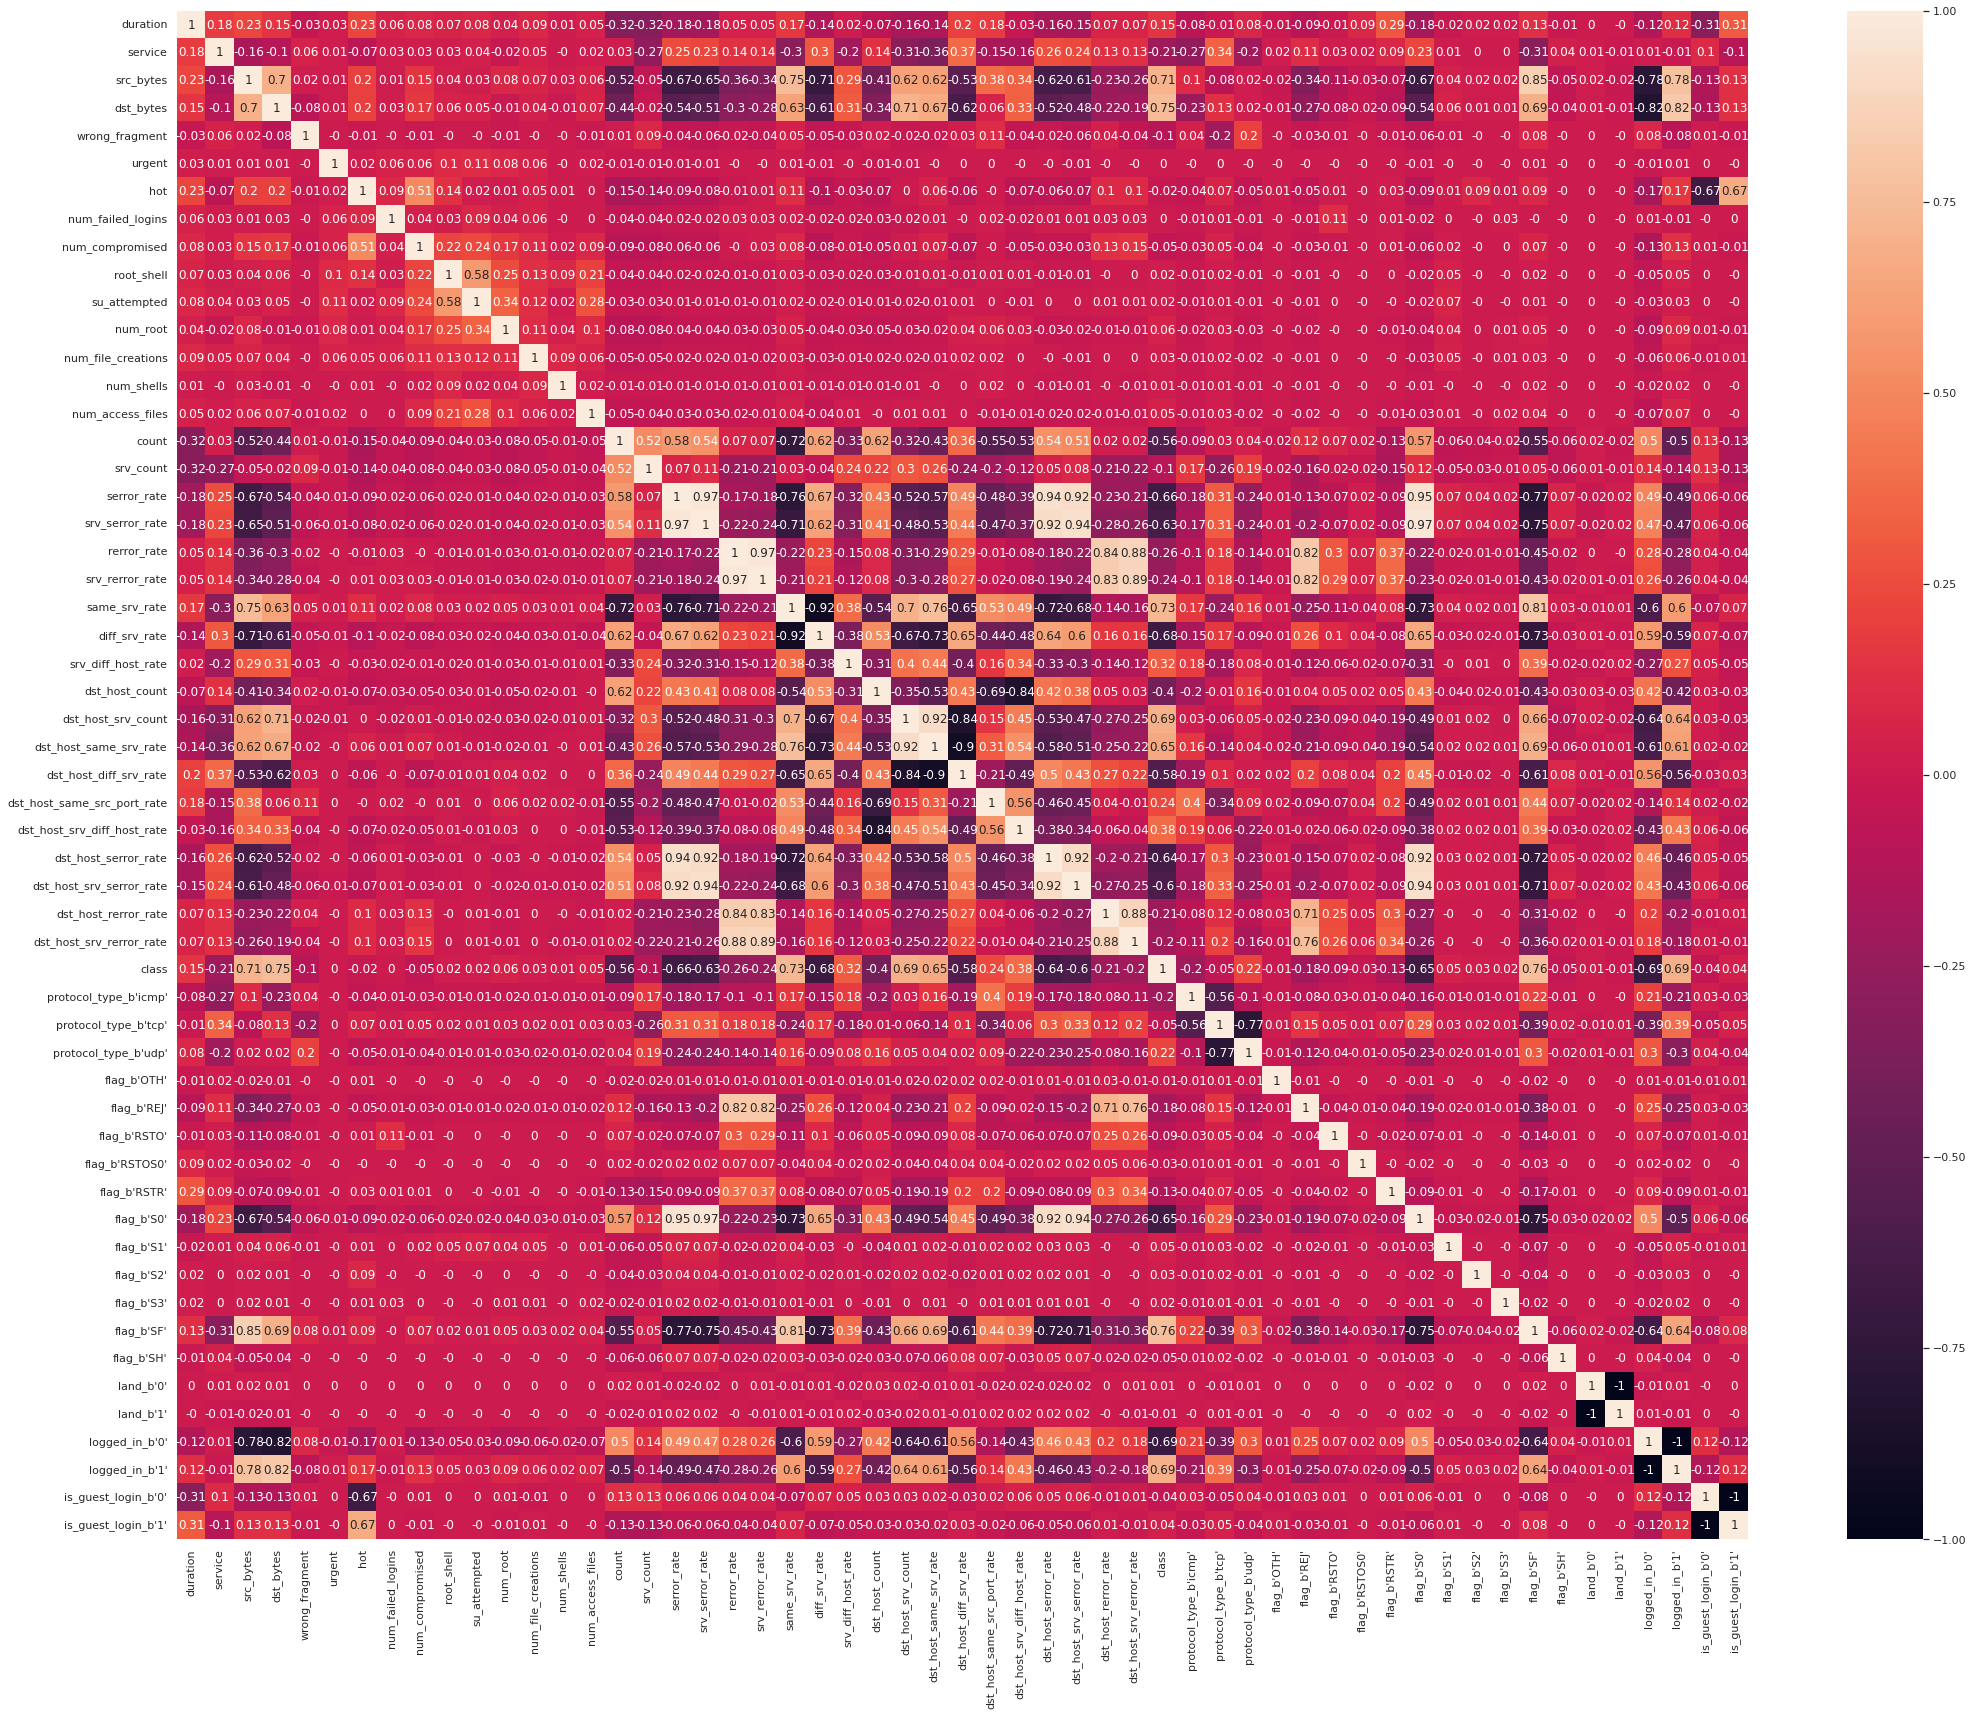

In [268]:
plt.figure(figsize=(30, 24))
sns.heatmap(ohe_train_df.corr(method='spearman').round(2), annot=True)
sns.set(rc={'figure.figsize':(120,80)})
plt.tight_layout()
plt.show()

src_bytes
dst_bytes
same_srv_rates

In [269]:
ohe_train_df.shape

(125973, 55)

In [270]:
class_column = ohe_train_df['class']
ohe_train_df.drop('class', axis=1, inplace=True)
test_class_column = ohe_test_df['class']
ohe_test_df.drop('class', axis=1, inplace=True)
x_train_forest = ohe_train_df
x_test_forest = ohe_test_df

In [271]:
selector = SelectFromModel(estimator=LogisticRegression(max_iter=400)).fit(ohe_train_df, class_column)
selector.transform(ohe_train_df)

test_selector = SelectFromModel(estimator=LogisticRegression(max_iter=400)).fit(ohe_test_df, test_class_column)
test_selector.transform(ohe_test_df)

/home/mieszko/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       ...,
       [2., 1., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [272]:
ohe_train_df.shape 

(125973, 54)

In [276]:
random_forest_selector = SelectFromModel(estimator=RandomForestClassifier()).fit(x_train_forest, class_column)
selector.transform(x_train_forest)

random_forest_test_selector = SelectFromModel(estimator=RandomForestClassifier()).fit(x_test_forest, test_class_column)
random_forest_test_selector.transform(x_test_forest)

array([[0.0000e+00, 4.5000e+01, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [0.0000e+00, 4.5000e+01, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0000e+00, 1.9000e+01, 1.2983e+04, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [0.0000e+00, 2.2000e+01, 5.4540e+04, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [0.0000e+00, 1.1000e+01, 4.2000e+01, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [0.0000e+00, 5.2000e+01, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00]])

In [279]:
parameters = {'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)],
                'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)] + [None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions = parameters, n_iter = 100, cv = 3, random_state=42, n_jobs = -1)
random_search.fit(x_train_forest, class_column)
print(random_search.best_params_)

{'n_estimators': 136, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': False}


In [283]:
# #Train data using logistic regression
st_x = StandardScaler()
x_train = st_x.fit_transform(ohe_train_df)
logistic_regression = LogisticRegression(max_iter=400)
logistic_regression.fit(x_train, class_column)
#Predict result for test data
train_predictions = logistic_regression.predict(x_train)



In [284]:
# Test data using logistic regression
x_test = st_x.fit_transform(ohe_test_df)
logistic_regression.fit(x_test, test_class_column)
# Predict result for test data
test_predictions = logistic_regression.predict(x_test)


In [285]:
print("-----------------------------------------------------------------------")
score = accuracy_score(class_column.values, train_predictions)
print("Accuracy train set prediction: " + str(score))
train_logistic_regression_precission = precision_score(class_column.values, train_predictions)
print("Precision score train set prediction: " + str(train_logistic_regression_precission))
print("-----------------------------------------------------------------------")
test_score = accuracy_score(test_class_column.values, test_predictions)
print("Accuracy test set prediction: " + str(test_score))
test_logistic_regression_precission = precision_score(test_class_column.values, test_predictions)
print("Precision score test set prediction: " + str(test_logistic_regression_precission))
print("-----------------------------------------------------------------------")


-----------------------------------------------------------------------
Accuracy train set prediction: 0.9566018114992896
Precision score train set prediction: 0.9519267287972187
-----------------------------------------------------------------------
Accuracy test set prediction: 0.9474804826117814
Precision score test set prediction: 0.9575061701899346
-----------------------------------------------------------------------


In [280]:
x_train_forest_data = st_x.fit_transform(x_train_forest)
random_forest_classifier = RandomForestClassifier(**random_search.best_params_)
random_forest_classifier.fit(x_train_forest_data, class_column)
#Predict result for test data
forest_train_predictions = random_forest_classifier.predict(x_train)

In [281]:
x_test_forest_data = st_x.fit_transform(x_test_forest)
random_forest_classifier.fit(x_test_forest_data, test_class_column)
#Predict result for test data
forest_test_predictions = random_forest_classifier.predict(x_test_forest_data)

In [282]:
print("-----------------------------------------------------------------------")
score = accuracy_score(class_column.values, forest_train_predictions)
print("Accuracy train set prediction: " + str(score))
train_logistic_regression_precission = precision_score(class_column.values, forest_train_predictions)
print("Precision score train set prediction: " + str(train_logistic_regression_precission))
print("-----------------------------------------------------------------------")
test_score = accuracy_score(test_class_column.values, forest_test_predictions)
print("Accuracy test set prediction: " + str(test_score))
test_forest_classifirer_precission = precision_score(test_class_column.values, forest_test_predictions)
print("Precision score test set prediction: " + str(test_forest_classifirer_precission))
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
Accuracy train set prediction: 0.999944432537131
Precision score train set prediction: 1.0
-----------------------------------------------------------------------
Accuracy test set prediction: 0.9976046841731725
Precision score test set prediction: 1.0
-----------------------------------------------------------------------
